In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist 
from keras.layers import Input , Dense 
from keras.models import Model

In [2]:
# Loading The Data
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# PreProcess The Data
def pre_process(X):
    X=X/255.0
    X=X.reshape((len(X), 784))
    return X

In [4]:
x_train = pre_process(x_train)
x_test = pre_process(x_test)

In [5]:
# Function to Display The Data 
def display_data(data, height, width, title):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        ax=plt.subplot(1,10,i+1)
        plt.imshow(data[i].reshape((height,width)))
        plt.gray()      
    plt.suptitle(title)

In [11]:
# Our AutoEncoder
def AutoEncoder():
    # Input Layer
    input_layer=Input(shape=(784,), name="input_layer")
    
    # encoder
    h_1=Dense(256, activation='relu', name="hidden_layer_1")(input_layer)
    h_2=Dense(128, activation='relu', name="hidden_layer_2")(h_1)
    h_3=Dense(64, activation='relu', name="hidden_layer_3")(h_2)
    h_4=Dense(32, activation='relu', name="hidden_layer_4")(h_3)
    h_5=Dense(16, activation='relu', name="hidden_layer_5")(h_4)
    h_6=Dense(8, activation='relu', name="hidden_layer_6")(h_5)
    
    # code layer
    code_layer=Dense(4, activation='relu', name="code_layer")(h_6)
    
    # decoder
    h_7=Dense(8, activation='relu', name="hidden_layer_7")(code_layer)
    h_8=Dense(16, activation='relu', name="hidden_layer_8")(h_7)
    h_9=Dense(32, activation='relu', name="hidden_layer_9")(h_8)
    h_10=Dense(64, activation='relu', name="hidden_layer_10")(h_9)
    h_11=Dense(128, activation='relu', name="hidden_layer_11")(h_10)
    h_12=Dense(256, activation='relu', name="hidden_layer_12")(h_11)
    
    # Output Layer
    output_layer=Dense(784, activation='sigmoid', name="output_layer")(h_12)
    model=Model(input_layer, output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.summary()
    
    return model


In [12]:
# Training The Model
Auto_Encoder=AutoEncoder()
Auto_Encoder.fit(x_train, x_train, epochs=20) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                8256      
                                                                 
 hidden_layer_4 (Dense)      (None, 32)                2080      
                                                                 
 hidden_layer_5 (Dense)      (None, 16)                528       
                                                                 
 hidden_layer_6 (Dense)      (None, 8)                 136   

In [13]:
# Get The Decoded Data (The Final Output)
decoded_data=Auto_Encoder.predict(x_test)

313/313 [==============================] - 4s 5ms/step


In [14]:
# Get The Encoder Part of The Model 
encoder=Model(inputs=Auto_Encoder.input, outputs=Auto_Encoder.get_layer("code_layer").output)

In [15]:
# get The Encoded Data (compressed representation of size 2*2)
encoded_data=encoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


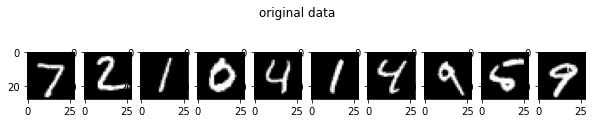

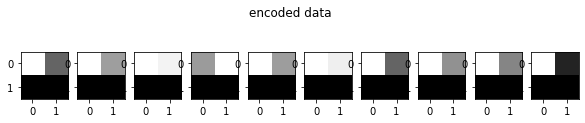

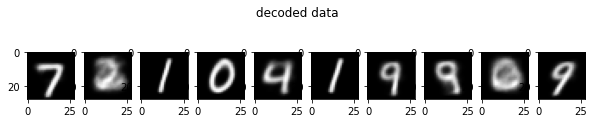

In [17]:
# Display The Final Result
display_data(x_test, height=28, width=28, title="original data")
display_data(encoded_data, height=2, width=2, title="encoded data")
display_data(decoded_data, height=28, width=28, title="decoded data")

Conclusion  : Hence , we have studied and implemented Autoencoders on MNIST dataset .